In [1]:
#This program uses the an artificial recurrent neural network called Long Short Term Memory(LSTM)

In [2]:
import pandas as pd
import numpy as np
import math
import pandas_datareader as wb
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')






In [3]:
df=wb.DataReader('AAPL',data_source='yahoo' ,start='2012-01-01',end='2019-12-17')

In [4]:
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.629209
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.697079
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.838044
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.972249
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.951672
...,...,...,...,...,...,...
2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,66.899139
2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.069626
2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,67.981300


In [5]:
df.shape

(2003, 6)

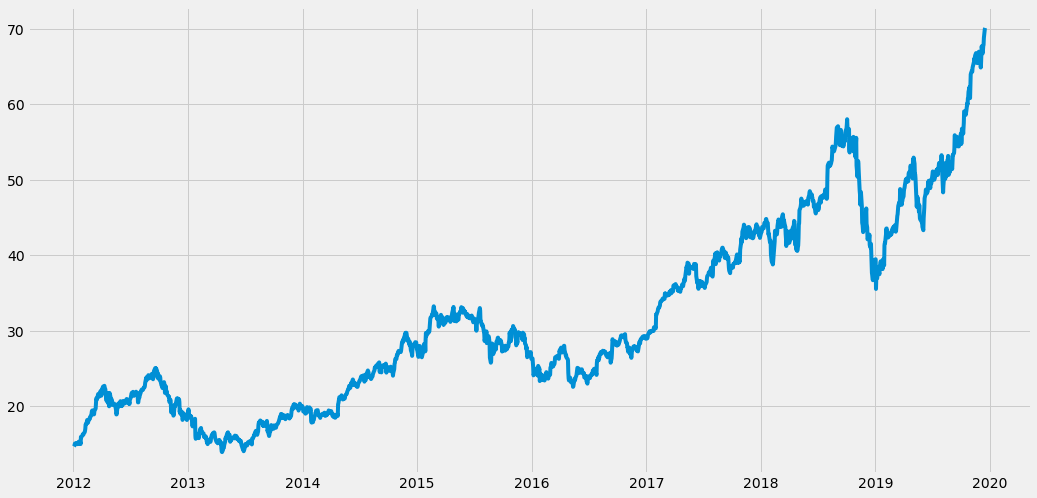

In [6]:
plt.figure(figsize=(16,8))
plt.plot(df['Close'])
plt.show()

In [7]:
data=df.filter(['Close'])
data

,Close
Date,
2012-01-03,14.686786
2012-01-04,14.765714
2012-01-05,14.929643
2012-01-06,15.085714
2012-01-09,15.061786
...,...
2019-12-11,67.692497
2019-12-12,67.864998
2019-12-13,68.787498


In [8]:
df['Close']

Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
2019-12-17    70.102501
Name: Close, Length: 2003, dtype: float64

In [9]:
da=data.to_numpy()
da

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [68.78749847],
       [69.96499634],
       [70.10250092]])

In [10]:
dataset=data.values
dataset

array([[14.6867857 ],
       [14.76571369],
       [14.92964268],
       ...,
       [68.78749847],
       [69.96499634],
       [70.10250092]])

In [11]:
training_data_len=math.ceil(len(dataset)*.8)
#math.ceil rounds up

In [12]:
training_data_len

1603

In [13]:
#Scale the data

In [14]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)

In [15]:
scaled_data

array([[0.01316509],
       [0.01457063],
       [0.01748985],
       ...,
       [0.97658263],
       [0.99755134],
       [1.        ]])

In [16]:


#Create the training dataset
#Create the scaled training dataset

In [17]:
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train datasets
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.01316509, 0.01457063, 0.01748985, 0.02026915, 0.01984303,
       0.02080338, 0.02036454, 0.01962679, 0.01862191, 0.02173194,
       0.02453668, 0.02367172, 0.01893355, 0.02345548, 0.01900352,
       0.03569838, 0.03440732, 0.0360927 , 0.03973694, 0.04194384,
       0.0417594 , 0.0410789 , 0.04397903, 0.04670744, 0.04979839,
       0.05479095, 0.0652785 , 0.06543749, 0.07127594, 0.07563885,
       0.06814049, 0.07102789, 0.07097066, 0.07906688, 0.07791571,
       0.08004628, 0.08387497, 0.08600558, 0.09214292, 0.09661394,
       0.09790501, 0.09835659, 0.09071194, 0.08886753, 0.08914103,
       0.09632778, 0.09835024, 0.10269409, 0.11293358, 0.12659476,
       0.12403805, 0.1240444 , 0.13392141, 0.13701237, 0.13481179,
       0.13280207, 0.13070964, 0.13766105, 0.14243103, 0.14442805])]
[0.13949272033425864]



In [18]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [19]:
x_train.shape

(1543, 60)

In [20]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1543, 60, 1)

In [21]:
model=Sequential()

In [22]:
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))

In [23]:
model.add(LSTM(50,return_sequences=False))

In [24]:
model.add(Dense(25))
model.add(Dense(1))

In [25]:
#Compiling the model

In [26]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [27]:
#Train the model

In [28]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

Epoch 1/10
1543/1543 [==============================] - 67s 35ms/step - loss: 9.7502e-04
Epoch 2/10
1543/1543 [==============================] - 52s 34ms/step - loss: 3.2247e-04
Epoch 3/10
1543/1543 [==============================] - 52s 33ms/step - loss: 2.1739e-04
Epoch 4/10
1543/1543 [==============================] - 52s 34ms/step - loss: 1.8321e-04
Epoch 5/10
1543/1543 [==============================] - 53s 34ms/step - loss: 2.3462e-04
Epoch 6/10
1543/1543 [==============================] - 53s 35ms/step - loss: 1.5434e-04
Epoch 7/10
1543/1543 [==============================] - 55s 35ms/step - loss: 1.2697e-04
Epoch 8/10
1543/1543 [==============================] - 55s 36ms/step - loss: 1.3663e-04
Epoch 9/10
1543/1543 [==============================] - 55s 35ms/step - loss: 1.4027e-04
Epoch 10/10
1543/1543 [==============================] - 56s 36ms/step - loss: 1.3471e-04


In [29]:
test_data=scaled_data[training_data_len-60:,:]

In [30]:
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    



In [31]:
x_test=np.array(x_test)
x_test.shape

(400, 60)

In [32]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [33]:
#Get the models predicted price values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [34]:
#get the root mean squared error()
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse


0.30549774169921873

In [35]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

<ipython-input-35-056f97340969>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


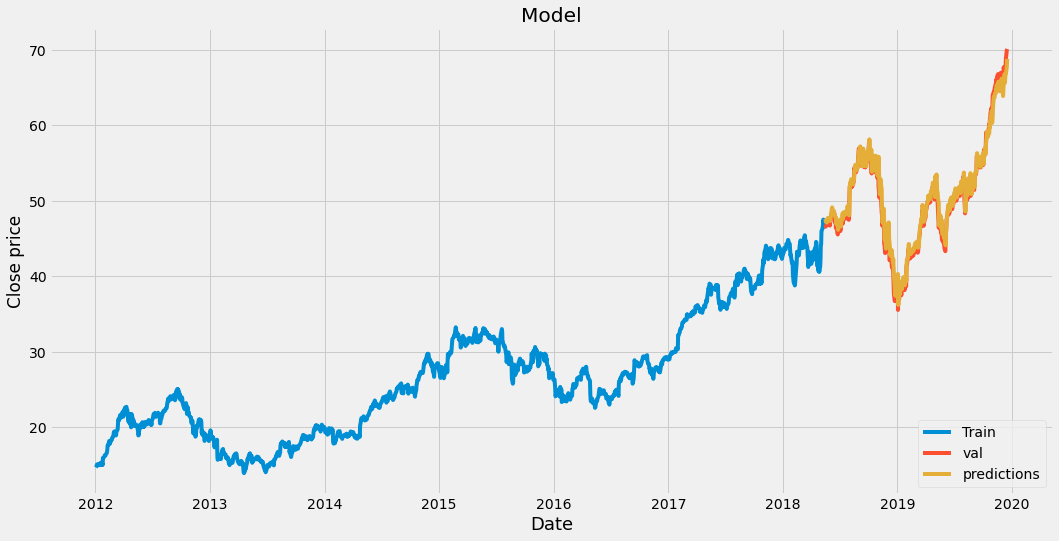

In [36]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close price')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','val','predictions'],loc='lower right')
plt.show()

In [37]:
#show valid and predicted prices
valid

,Close,Predictions
Date,,
2018-05-17,46.747501,47.599743
2018-05-18,46.577499,47.218212
2018-05-21,46.907501,47.129593
2018-05-22,46.790001,47.486824
2018-05-23,47.090000,47.343449
...,...,...
2019-12-11,67.692497,66.278618
2019-12-12,67.864998,66.666595
2019-12-13,68.787498,66.780327


In [38]:
#get the quote
apple_quote=wb.DataReader('AAPL',data_source='yahoo',start='2012-1-1',end='2019-12-17')

In [39]:
new_df=apple_quote.filter(['Close'])

In [40]:
#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days=new_df[-60:].values

In [41]:
#Scale the data
last_60_days_scaled=scaler.transform(last_60_days)


In [42]:
#create an empty list
x_test=[]
#Append the last 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test=np.array(x_test)
#reshape the data 
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))




In [43]:
#Get the preidicted scaled price
pred_price=model.predict(x_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[68.74773]]


In [44]:
#Get the quote
apple_quote2=wb.DataReader('AAPL',data_source='yahoo',start='2019-12-18',end='2019-12-18')

In [45]:
print(apple_quote2['Close'])

Date
2019-12-18    69.934998
Name: Close, dtype: float64
